In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
    
df_train=pd.read_csv('/Users/pawanp29/Downloads/Predictive_Data/train_file.csv')

In [125]:
df_train.head()

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType,combined,Length
0,1,1,1,2005,4,1,Tidal wave,No Creator,"Tsunamis, Tsunamis Juvenile literature",No Publisher,0,BOOK,"Tidal wave No Creator Tsunamis, Tsunamis Juven...",73
2,3,1,1,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",c2002.,BOOK,Cinco de Mayo : celebrating Hispanic pride / C...,420
3,4,1,1,2005,4,1,Annapolis,No Creator,"War stories, Historical fiction, Domestic fict...",No Publisher,0,BOOK,"Annapolis No Creator War stories, Historical f...",287
4,5,1,1,2005,4,1,As a man thinketh,No Creator,Thought and thinking,No Publisher,0,BOOK,As a man thinketh No Creator Thought and think...,62
5,6,1,1,2005,4,4,Minnie and Moo go dancing / [written and illus...,"Cazet, Denys","Cows Juvenile fiction, Parties Fiction, Farm l...","DK Pub.,",c1998.,BOOK,Minnie and Moo go dancing / [written and illus...,176


In [86]:
# Check the null values across all columns
df_train.isnull().sum() * 100 / len(df_train)

ID                  0.000000
UsageClass          0.000000
CheckoutType        0.000000
CheckoutYear        0.000000
CheckoutMonth       0.000000
Checkouts           0.000000
Title               0.000000
Creator            73.095757
Subjects            5.569772
Publisher          69.238303
PublicationYear    69.285692
MaterialType        0.000000
dtype: float64

In [87]:
# Replace Null values in Creator, Publisher and Publication Year by No Creator, No Publisher and 0
df_train['Creator'].fillna("No Creator", inplace = True)
df_train['Publisher'].fillna("No Publisher", inplace = True)
df_train['PublicationYear'].fillna("0", inplace = True)

In [88]:
df_train.head()

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType
0,1,Physical,Horizon,2005,4,1,Tidal wave,No Creator,"Tsunamis, Tsunamis Juvenile literature",No Publisher,0,BOOK
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",NaN,"Viking,",1998.,BOOK
2,3,Physical,Horizon,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",c2002.,BOOK
3,4,Physical,Horizon,2005,4,1,Annapolis,No Creator,"War stories, Historical fiction, Domestic fict...",No Publisher,0,BOOK
4,5,Physical,Horizon,2005,4,1,As a man thinketh,No Creator,Thought and thinking,No Publisher,0,BOOK


In [89]:
df_train.isnull().sum() * 100 / len(df_train)

ID                 0.000000
UsageClass         0.000000
CheckoutType       0.000000
CheckoutYear       0.000000
CheckoutMonth      0.000000
Checkouts          0.000000
Title              0.000000
Creator            0.000000
Subjects           5.569772
Publisher          0.000000
PublicationYear    0.000000
MaterialType       0.000000
dtype: float64

In [90]:
df_train['Creator'].value_counts()

No Creator                     23137
Rylant, Cynthia                   16
Gibbons, Gail                     14
Brown, Marc Tolon                 13
DePaola, Tomie, 1934-             13
                               ...  
Gash, Norman                       1
Davis, Aubrey                      1
Burton, Maurice, 1898-1992.        1
Thomas, Ross, 1926-1995            1
Hillary, Peter                     1
Name: Creator, Length: 6732, dtype: int64

In [91]:
df_train['Publisher'].value_counts()

No Publisher                                                                                                                                                                   21916
Random House,                                                                                                                                                                    116
HarperCollins,                                                                                                                                                                   113
Viking,                                                                                                                                                                          109
Thorndike Press,                                                                                                                                                                 109
                                                                                               

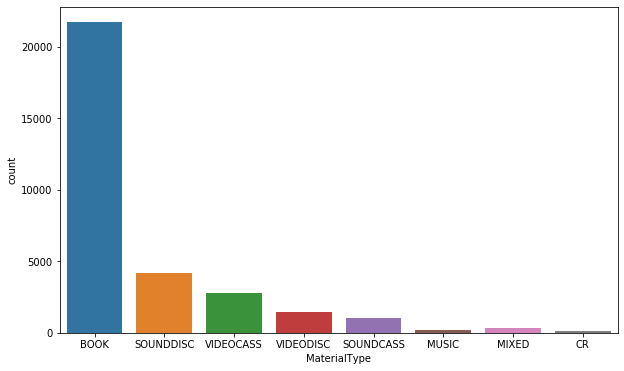

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(x='MaterialType',data=df_train)

In [93]:
len(df_train['Subjects'].unique())

24756

In [94]:
# Drop the Null Values of Subjects columns
df_train.dropna(inplace=True)

In [95]:
df_train['MaterialType'].value_counts()

BOOK         20366
SOUNDDISC     4138
VIDEOCASS     2742
VIDEODISC     1415
SOUNDCASS      915
MUSIC          165
CR              94
MIXED           55
Name: MaterialType, dtype: int64

In [96]:
# Create new column 'combined' after clubbing 4 columns
df_train['combined']=df_train.apply(lambda x:'%s %s %s %s' % (x['Title'],x['Creator'],x['Subjects'],x['Publisher'])
                                    ,axis=1)

In [97]:
# Update UsageClass & CheckoutType column with Numeric fields
df_train.loc[df_train['UsageClass'] == 'Physical', 'UsageClass'] = 1
df_train.loc[df_train['CheckoutType'] == 'Horizon', 'CheckoutType'] = 1

In [98]:
# Almost all columns in combined column has unique value
len(df_train['combined'].unique())

29890

In [99]:
# Use NLP to find relationship b/w combined column and MaterialType
import nltk

In [100]:
# Get the info of combined column
df_train['combined'].describe()

count                                                 29890
unique                                                29890
top       stories of J F Powers No Creator United States...
freq                                                      1
Name: combined, dtype: object

In [101]:
# Info of combined column segregated by MaterialType
df_train.groupby('MaterialType')['combined'].describe()

,count,unique,top,freq
MaterialType,,,,
BOOK,20366,20366,"Desert No Creator Ecology, Deserts, Desert eco...",1
CR,94,94,Chilton's truck and van repair manual. No Crea...,1
MIXED,55,55,Learn to play chess with Fritz Chesster No Cre...,1
MUSIC,165,165,Al Gallico's 42 Nashville hits of the 70's [mu...,1
SOUNDCASS,915,915,mouse cookie and other songs games and reading...,1
SOUNDDISC,4138,4138,Arrival No Creator Rock music 2001 2010 No Pub...,1
VIDEOCASS,2742,2742,Italian job No Creator Video recordings for th...,1
VIDEODISC,1415,1415,Wiggles Magical adventure a wiggly movie No Cr...,1


In [102]:
# Populate the length of combined column in a new one
df_train['Length']=df_train['combined'].apply(len)

In [103]:
df_train.head(1)

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType,combined,Length
0,1,1,1,2005,4,1,Tidal wave,No Creator,"Tsunamis, Tsunamis Juvenile literature",No Publisher,0,BOOK,"Tidal wave No Creator Tsunamis, Tsunamis Juven...",73


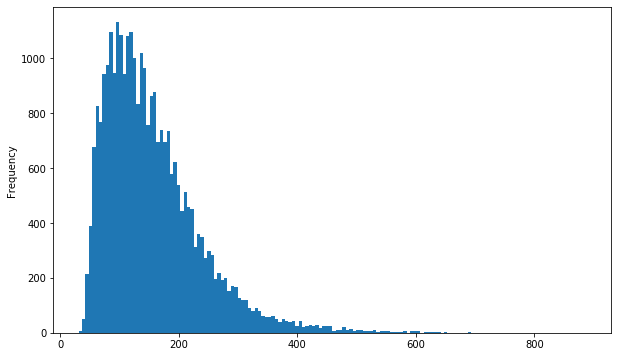

In [104]:
# Plot the graph of length of Length column
plt.figure(figsize=(10,6))
df_train['Length'].plot.hist(bins=150)

In [105]:
# Get the max length message
df_train[df_train['Length']==df_train['Length'].max()]['combined'].iloc[0]

'Jazz. Episode five, Swing, pure pleasure [videorecording] / a production of Florentine Films and WETA, Washington D.C. in association with BBC ; a film by Ken Burns ; writer, Geoffrey C. Ward ; producers, Ken Burns, Lynn Novick. No Creator Armstrong Louis 1901 1971, Ellington Duke 1899 1974, Goodman Benny 1909 1986, Webb Chick, Dorsey Tommy 1905 1956, Lunceford Jimmie, Miller Glenn 1904 1944, Shaw Artie 1910 2004, Holiday Billie 1915 1959, Savoy Ballroom New York N Y History, Depressions 1929 United States History Songs and music, Jazz 1931 1940 History and criticism, Jazz musicians United States Biography, African American musicians Biography, African Americans Music, Jazz dance United States, Swing Music History and criticism, Discrimination in public accommodations United States History 20th century, Discrimination in employment United States History 20th century PBS DVD,'

In [106]:
df_train['Length'].describe()

count    29890.000000
mean       156.017966
std         82.248761
min         31.000000
25%         97.000000
50%        139.000000
75%        194.000000
max        887.000000
Name: Length, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c1938d9d0>,
      dtype=object)

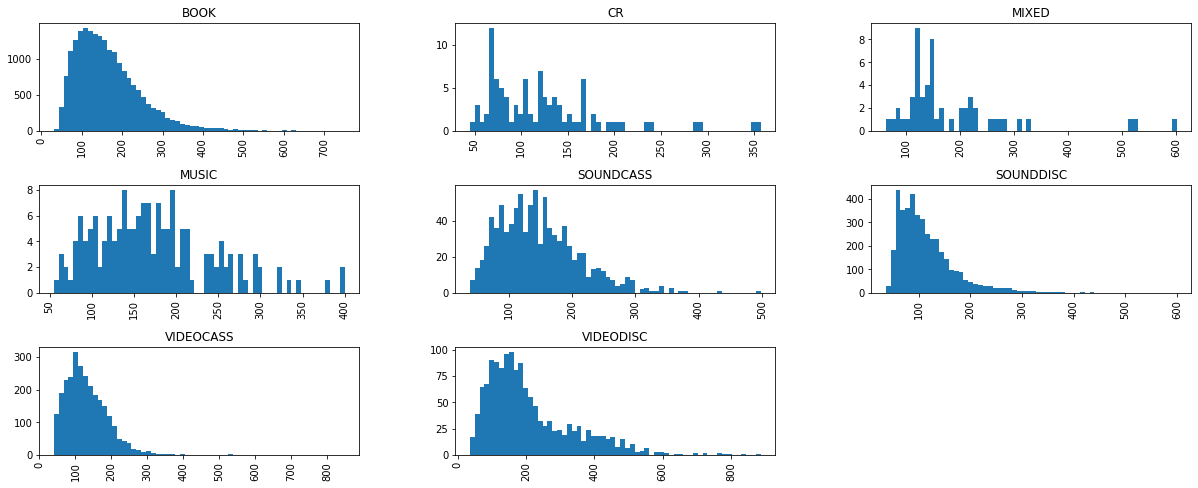

In [107]:
df_train.hist(column='Length',by='MaterialType',bins=60,figsize=(20,8))

In [108]:
# find punctuations
import string
from nltk.corpus import stopwords

In [109]:
def text_cleanup(mess):
    nonpunc=[c for c in mess if c not in string.punctuation]
    nonpunc=''.join(nonpunc)
    return [word for word in nonpunc.split() if word.lower() not in stopwords.words('English')]

In [110]:
df_train['combined'].head().apply(text_cleanup)

0    [Tidal, wave, Creator, Tsunamis, Tsunamis, Juv...
2    [Cinco, de, Mayo, celebrating, Hispanic, pride...
3    [Annapolis, Creator, War, stories, Historical,...
4    [man, thinketh, Creator, Thought, thinking, Pu...
5    [Minnie, Moo, go, dancing, written, illustrate...
Name: combined, dtype: object

In [111]:
# Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer

bow_tranformer=CountVectorizer(analyzer=text_cleanup).fit(df_train['combined'])

In [112]:
# Get the total words in matrix
len(bow_tranformer.vocabulary_)

46147

In [113]:
# Run Pipeline
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
# Get the TF-idf
from sklearn.feature_extraction.text import TfidfTransformer

In [114]:
message_bow=bow_tranformer.transform(df_train['combined'])

In [115]:
# Fit the function TfidfTransformer().fit to bag of words - message_bow
tfidf_transformer=TfidfTransformer().fit(message_bow)

In [116]:
messages_idf=tfidf_transformer.transform(message_bow)

In [117]:
bow_tranformer

CountVectorizer(analyzer=<function text_cleanup at 0x7f9c2b804050>)

In [118]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [119]:
def pipeline_build_exec(Model):
    pipeline_Model=Pipeline([('bow', CountVectorizer(analyzer=text_cleanup)),
                   ('tfidf', TfidfTransformer()),
                   ('classifier',Model())
                 ])
    msg_train,msg_test,label_train,label_test=train_test_split(df_train['combined'], df_train['MaterialType'], 
                                                           test_size=0.2)
    pipeline.fit(msg_train,label_train)
    predictions=pipeline.predict(msg_test)
    print(confusion_matrix(label_test,predictions))
    print(classification_report(label_test,predictions))
    print('\n')

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [121]:
print(' 1. Classification Report of MultinomialNB          : -')
print('\n')
pipeline_build_exec(MultinomialNB)
print(' 2. Classification Report of RandomForestClassifier : -')
print('\n')
pipeline_build_exec(RandomForestClassifier)
print(' 3. Classification Report of LogisticRegression     : -')
print('\n')
pipeline_build_exec(LogisticRegression)
print(' 4. Classification Report of DecisionTreeClassifier : -')
print('\n')
pipeline_build_exec(DecisionTreeClassifier)

 1. Classification Report of MultinomialNB          : -


[[4043    0    0    0    0    3    0    0]
 [  12    0    0    0    0    0    0    0]
 [   7    0    0    0    0    1    0    0]
 [   8    0    0    0    0   15    0    0]
 [ 188    0    0    0    0    2    0    0]
 [ 147    0    0    0    0  735    0    0]
 [ 288    0    0    0    0   13  250    0]
 [ 107    0    0    0    0    8   88   63]]
              precision    recall  f1-score   support

        BOOK       0.84      1.00      0.91      4046
          CR       0.00      0.00      0.00        12
       MIXED       0.00      0.00      0.00         8
       MUSIC       0.00      0.00      0.00        23
   SOUNDCASS       0.00      0.00      0.00       190
   SOUNDDISC       0.95      0.83      0.89       882
   VIDEOCASS       0.74      0.45      0.56       551
   VIDEODISC       1.00      0.24      0.38       266

    accuracy                           0.85      5978
   macro avg       0.44      0.32      0.34      5978
w

/Users/pawanp29/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[4042    0    0    0    0    4    0    0]
 [  25    0    0    0    0    0    0    0]
 [   8    0    0    0    0    1    0    0]
 [   4    0    0    0    0   21    0    0]
 [ 174    0    0    0    0    3    0    0]
 [ 146    0    0    0    0  703    0    1]
 [ 278    0    0    0    0    8  262    0]
 [ 127    0    0    0    0    4   95   72]]
              precision    recall  f1-score   support

        BOOK       0.84      1.00      0.91      4046
          CR       0.00      0.00      0.00        25
       MIXED       0.00      0.00      0.00         9
       MUSIC       0.00      0.00      0.00        25
   SOUNDCASS       0.00      0.00      0.00       177
   SOUNDDISC       0.94      0.83      0.88       850
   VIDEOCASS       0.73      0.48      0.58       548
   VIDEODISC       0.99      0.24      0.39       298

    accuracy                           0.85      5978
   macro avg       0.44      0.32      0.35      5978
weighted avg       0.82      0.85      0.82      5978



 3

/Users/pawanp29/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[4039    0    0    0    0    4    0    0]
 [  15    0    0    0    0    0    0    0]
 [   9    0    0    0    0    0    0    0]
 [   7    0    0    0    0   26    0    0]
 [ 198    0    0    0    0    2    0    0]
 [ 164    0    0    0    0  648    0    0]
 [ 278    0    0    0    0    9  260    0]
 [ 132    0    0    0    0   13   99   75]]
              precision    recall  f1-score   support

        BOOK       0.83      1.00      0.91      4043
          CR       0.00      0.00      0.00        15
       MIXED       0.00      0.00      0.00         9
       MUSIC       0.00      0.00      0.00        33
   SOUNDCASS       0.00      0.00      0.00       200
   SOUNDDISC       0.92      0.80      0.86       812
   VIDEOCASS       0.72      0.48      0.57       547
   VIDEODISC       1.00      0.24      0.38       319

    accuracy                           0.84      5978
   macro avg       0.44      0.31      0.34      5978
weighted avg       0.81      0.84      0.80      5978



 4

/Users/pawanp29/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[4063    0    0    0    0    6    0    0]
 [  21    0    0    0    0    0    0    0]
 [   6    0    0    0    0    2    1    0]
 [  12    0    0    0    0   22    0    0]
 [ 184    0    0    0    0    4    0    0]
 [ 164    0    0    0    0  676    0    0]
 [ 283    0    0    0    0   11  263    1]
 [ 110    0    0    0    0    5   84   60]]
              precision    recall  f1-score   support

        BOOK       0.84      1.00      0.91      4069
          CR       0.00      0.00      0.00        21
       MIXED       0.00      0.00      0.00         9
       MUSIC       0.00      0.00      0.00        34
   SOUNDCASS       0.00      0.00      0.00       188
   SOUNDDISC       0.93      0.80      0.86       840
   VIDEOCASS       0.76      0.47      0.58       558
   VIDEODISC       0.98      0.23      0.38       259

    accuracy                           0.85      5978
   macro avg       0.44      0.31      0.34      5978
weighted avg       0.82      0.85      0.81      5978





/Users/pawanp29/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
# The accuracy generated by algorithms is almost same, hence execution time would be a key parameter to decide the
# best algorithm.